<a href="https://colab.research.google.com/github/sandipanpaul21/Machine-Learning-in-Python-Code/blob/master/06_Regression_Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Regression Assumptions**

- Linear regression is a fundamental tool that has advantages over other regression algorithms
- Due to its simplicity, it’s an exceptionally quick algorithm to train thus typically makes it a good baseline algorithm for common regression scenarios.
- Importantly, models trained with linear regression are the most interpretable kind of regression models available: it’s easier to take action from the results of a linear regression model.
- However, if the assumptions are not satisfied,the interpretation of the results will not always be valid.
- This can be very dangerous depending on the application.

In [ ]:
# Libraries 

from sklearn import datasets 
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Boston Dataset for Regression

boston = datasets.load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df["HousePrice"] = boston.target
print("Top 5 Rows of the dataset")
df.head()

Top 5 Rows of the dataset


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Initial Setup

# Before we test the assumptions, we’ll need to fit our linear regression models. 
# Fitting the model
boston_model = LinearRegression()
boston_model.fit(boston.data, boston.target)

# Returning the R^2 for the model
boston_r2 = boston_model.score(boston.data, boston.target)
print('R^2: {0}'.format(boston_r2))

# Inference :
# R Square is 0.74
# 74% variance explained by the independent variable

R^2: 0.7406426641094095


**ASSUMPTION 1 : Linearity**

- This assumes that there is a linear relationship between the predictors 
- e.g. independent variables or features & the response variable(e.g.dependent variable/label)
- This also assumes that the predictors are additive.

**Why it can happen:**
- There may not just be a linear relationship among the data. 
- Modeling is about trying to estimate a function that explains a process
- Linear regression would not be a fitting estimator if there is no linear relationship.

**What it will affect:**
- The predictions will be extremely inaccurate because our model is underfitting. 
- This is a serious violation that should not be ignored.

**How to detect it:**
- If there is only one predictor, this is pretty easy to test with a scatter plot. 
- Most cases aren’t so simple, so we’ll have to modify this by using a scatter plot to see our predicted values versus the actual values (in other words, view the residuals). 
- Ideally, the points should lie on or around a diagonal line on the scatter plot.

**How to fix it: **
- Either adding polynomial terms to some of the predictors/applying nonlinear transformations
- If those do not work, try adding additional variables to help capture the relationship between the predictors and the label.



Assumption 1: Linear Relationship between the Target and the Feature
Residual Calculation
   Actual  Predicted  Residuals
0    24.0  30.003843  -6.003843
1    21.6  25.025562  -3.425562
2    34.7  30.567597   4.132403
3    33.4  28.607036   4.792964
4    36.2  27.943524   8.256476




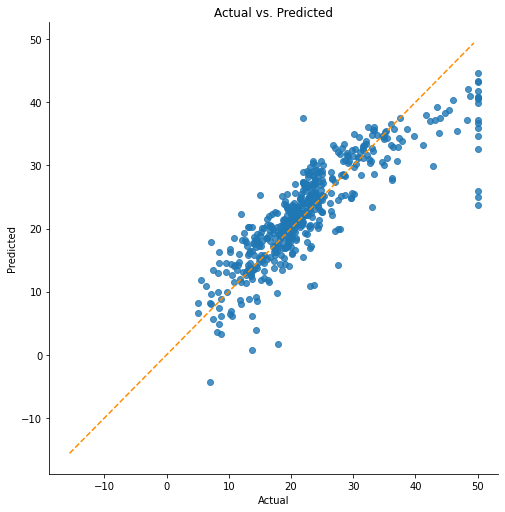

In [ ]:
print('Assumption 1: Linear Relationship between the Target and the Feature')        

# Initializing Variable name like model, independent features and label name in the dataset
model = boston_model
features = boston.data
label = boston.target

# Prediction and a table of Actual vs Predicted
predictions = model.predict(features)
df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})

# Calculating Residuals
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
print("Residual Calculation")
print(df_results.head())
print("\n")

# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
# Plotting the diagonal line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

# Inference : 
# We can see in this case that there is not a perfect linear relationship. 
# Our predictions are biased towards lower values in both the lower end (around 5-10) 
# and especially at the higher values (above 40).

**ASSUMPTION 2 : Normality of the Error Terms**

- More specifically, this assumes that the error terms of the model are normally distributed. 
- Linear regressions other than Ordinary Least Squares (OLS) may also assume normality of the predictors or the label, but that is not the case here.

**Why it can happen:**
- This can actually happen if either the predictors or the label are significantly non-normal. 
- Other potential reasons could include the linearity assumption being violated or outliers affecting our model.

**What it will affect:** 
- A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

**How to detect it:**
- We’ll look at both a histogram and the p-value from the Anderson-Darling test for normality.

**How to fix it:** 
- It depends on the root cause, but there are a few options. 
- Nonlinear transformations of the variables excluding specific variables (such as long-tailed variables) or removing outliers may solve this problem.



Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 8.311128328210816e-25
Residuals are not normally distributed


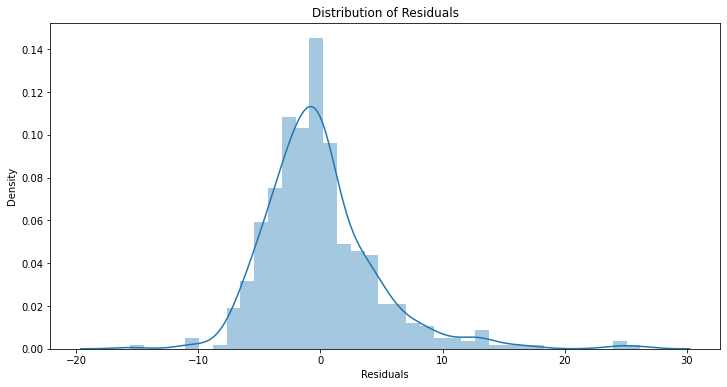


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Skewness of RESIDUAL : 1.533464025711795
Residual is Positive skewed


In [ ]:
print('Assumption 2: The error terms are normally distributed', '\n')
print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
# Reporting the normality of the residuals
p_value_thresh=0.05
if p_value < p_value_thresh:
  print('Residuals are not normally distributed')
else:
  print('Residuals are normally distributed')
    
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()
    
print()
if p_value > p_value_thresh:
  print('Assumption satisfied')
else:
  print('Assumption not satisfied')
  print()
  print('Confidence intervals will likely be affected')
  print('Try performing nonlinear transformations on variables')

# Check for another one variable
print("Skewness of RESIDUAL :",df_results['Residuals'].skew())
if df_results['Residuals'].skew() > 1:
  print('Residual is Positive skewed')
elif df_results['Residuals'].skew() < -1:
  print('Residual is Negative skewed')
else:
  print('Residual is not skewed')

# Inference : 
# This isn’t ideal, and we can see that our model is biasing towards under-estimating

**ASSUMPTION 3 - No Multicollinearity among Predictors**

- This assumes that the predictors used in the regression are not correlated with each other.
- This won’t render our model unusable if violated but it will cause issues with the interpretability of the model.

**Why it can happen:**
- A lot of data is just naturally correlated.
- For example, if trying to predict a house price with square footage, the number of bedrooms, and the number of bathrooms, we can expect to see correlation between those three variables because bedrooms and bathrooms make up a portion of square footage.

**What it will affect:**
- Multicollinearity causes issues with the interpretation of the coefficients.
- Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.”
- This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant.
- Additionally, it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant.

**How to detect it:**
- There are a few ways, but we will use a heatmap of the correlation as a visual aid and examine the variance inflation factor (VIF).

**How to fix it:**
- This can be fixed by other removing predictors with a high variance inflation factor (VIF) or performing dimensionality reduction.



Assumption 3: Little to no multicollinearity among predictors


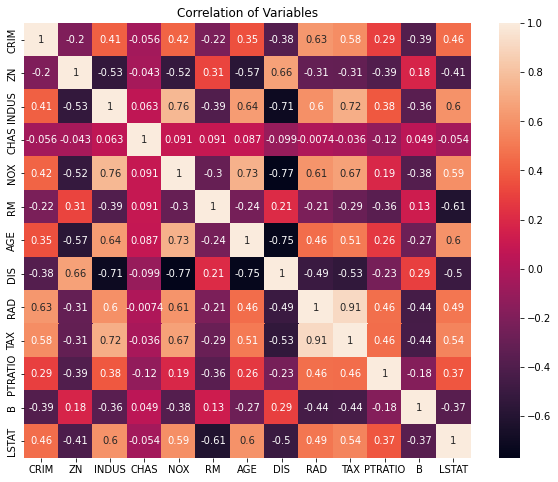

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
CRIM: 2.1003728199615224
ZN: 2.8440132669462637
INDUS: 14.485757706539331
CHAS: 1.1529518589418775
NOX: 73.89494652814788
RM: 77.94828304638538
AGE: 21.38685048994309
DIS: 14.6996523837492
RAD: 15.167724857920897
TAX: 61.227274009649456
PTRATIO: 85.02954731061801
B: 20.104942636229136
LSTAT: 11.102024772203539

10 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [ ]:
print('Assumption 3: Little to no multicollinearity among predictors')
        
# Plotting the heatmap
plt.figure(figsize = (10,8))
feature_names = boston.feature_names
sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
plt.title('Correlation of Variables')
plt.show()
        
print('Variance Inflation Factors (VIF)')
print('> 10: An indication that multicollinearity may be present')
print('> 100: Certain multicollinearity among the variables')
print('-------------------------------------')
       
# Gathering the VIF for each variable
VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
for idx, vif in enumerate(VIF):
  print('{0}: {1}'.format(feature_names[idx], vif))
        
# Gathering and printing total cases of possible or definite multicollinearity
possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
print()
print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
print()

if definite_multicollinearity == 0:
  if possible_multicollinearity == 0:
    print('Assumption satisfied')
  else:
    print('Assumption possibly satisfied')
    print()
    print('Coefficient interpretability may be problematic')
    print('Consider removing variables with a high Variance Inflation Factor (VIF)')
else:
  print('Assumption not satisfied')
  print()
  print('Coefficient interpretability will be problematic')
  print('Consider removing variables with a high Variance Inflation Factor (VIF)')

# Inference : 
# This isn’t quite as egregious as our normality assumption violation, 
# but there is possible multicollinearity for most of the variables in this dataset.

**ASSUMPTION 4 :  No Autocorrelation of the Error Terms**

- This assumes no autocorrelation of the error terms.
- Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

**Why it can happen:**
- In a time series scenario, there could be information about the past that we aren’t capturing. 
- In a non-time series scenario, our model could be systematically biased by either under or over predictingin certain conditions.
- Lastly, this could be a result of a violation of the linearity assumption.

** What it will affect**
- This will impact our model estimates.

**How to detect it:**
- We will perform a Durbin-Watson test to determine if either positive or negative correlation is present.
- Alternatively, you could create plots of residual autocorrelations.

**How to fix it:**
- A simple fix of adding lag variables can fix this problem.
- Alternatively, interaction terms, additional variables, or additional transformations may fix this.


In [ ]:
print('Assumption 4: No Autocorrelation')

print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

if durbinWatson < 1.5:
  print('Signs of positive autocorrelation', '\n')
  print('Assumption not satisfied')
elif durbinWatson > 2.5:
  print('Signs of negative autocorrelation', '\n')
  print('Assumption not satisfied')
else:
  print('Little to no autocorrelation', '\n')
  print('Assumption satisfied')

# Inference : 
# We’re having signs of positive autocorrelation here, 
# but we should expect this since we know our model is consistently under-predicting 
# and our linearity assumption is being violated.
# Since this isn’t a time series dataset, lag variables aren’t possible.
# Instead, we should look into either interaction terms or additional transformations.

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.0715916506006853
Signs of positive autocorrelation 

Assumption not satisfied


**ASSUMPTION 5 : Homoscedasticity**
- This assumes homoscedasticity, which is the same variance within our error terms.
- Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

**Why it can happen:** 
- Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest.

**What it will affect:** 
- Significance tests for coefficients due to the standard errors being biased. 
- Additionally, the confidence intervals will be either too wide or too narrow.

**How to detect it:** 
- Plot the residuals and see if the variance appears to be uniform.

**How to fix it:**
- Heteroscedasticity (can you tell I like the scedasticity words?) can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables.
- Performing a log transformation on the dependent variable is not a bad place to start.



Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


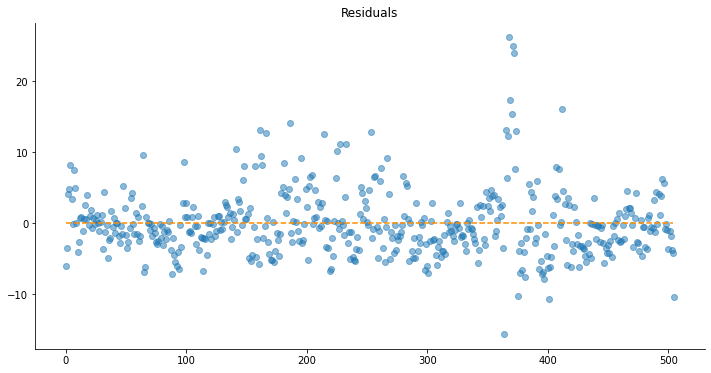

In [ ]:
print('Assumption 5: Homoscedasticity of Error Terms', '\n')
print('Residuals should have relative constant variance')
        
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

# Inference : 
# We can’t see a fully uniform variance across our residuals, so this is potentially problematic.
# However, we know from our other tests that our model has several issues 
# and is under predicting in many cases.

**Conclusion :**

- We can clearly see that a linear regression model on the Boston dataset violates number of assumptions which cause significant problems with the interpretation of the model itself.
- It’s not uncommon for assumptions to be violated on real-world data, but it’s important to check them so we can either fix them and/or be aware of the flaws in the model for the presentation of the results or the decision making process.
- It is dangerous to make decisions on a model that has violated assumptions because those decisions are effectively being formulated on made-up numbers.
- Not only that, but it also provides a false sense of security due to trying to be empirical in the decision making process.
- Empiricism requires due diligence, which is why these assumptions exist and are stated up front.